In [1]:
%load_ext autoreload
%autoreload 1
%aimport abc_mouse

In [2]:
import abc_mouse
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Allen Brain Cell Atlas (ABC) Mouse Datasets

- Allen Brain Cell Atlas (ABC) Mouse Single cell datasets
    - Yao et. al. (2023) :  Two large gene expression datasets and a Spatial Gene expression dataset
    - Zhang et. al. (2023) : Three Spatial Gene expresion datasets
- Current Focus: Yao et. al. (2023)  Spatial Transcriptomics Dataset
    - ~4.0 million cells.
    - 500 gene panel MERFESH dataset.
- Dataset source:
    - 59 coronal sections (10 micron thick) covering the whole anterior to posterior extent of the brain (~200 micron apart) from a single adult male mouse. 
- With MERFISH assay, each cell also has a set of x, y, z coordinates:
    - x and y generated by rotating each section so that it is upright with midline approximately in the middle of the frame.
    - z coordinate takes into account the physical spacing between each section



## Download ABC Data
We download all the necessary data first to a base directory to conduct these analyses

In [3]:
# Downloading the necessary data
abc_mouse.ABC_BASE = "/storage/home/hhive1/schockalingam6/data2/airavata-cerebrum/brain_atlases/abc_mouse" # Change this to the directory to download
abc_mouse.download_abc_data()

expression_matrices/MERFISH-C57BL6J-638850/20230830 : 14.21 GB
metadata/MERFISH-C57BL6J-638850/20231215 : 1.81 GB
expression_matrices/MERFISH-C57BL6J-638850-sections/20230630 : 14.31 GB
expression_matrices/WMB-10Xv2/20230630 : 104.16 GB
expression_matrices/WMB-10Xv3/20230630 : 176.41 GB
expression_matrices/WMB-10XMulti/20230830 : 0.21 GB
metadata/WMB-10X/20231215 : 2.39 GB
metadata/WMB-taxonomy/20231215 : 0.01 GB
metadata/WMB-neighborhoods/20231215 : 3.00 GB
image_volumes/Allen-CCF-2020/20230630 : 0.37 GB
metadata/Allen-CCF-2020/20230630 : 0.00 GB
image_volumes/MERFISH-C57BL6J-638850-CCF/20230630 : 0.11 GB
metadata/MERFISH-C57BL6J-638850-CCF/20231215 : 2.01 GB
expression_matrices/Zhuang-ABCA-1/20230830 : 3.09 GB
metadata/Zhuang-ABCA-1/20231215 : 1.33 GB
metadata/Zhuang-ABCA-1-CCF/20230830 : 0.21 GB
expression_matrices/Zhuang-ABCA-2/20230830 : 1.30 GB
metadata/Zhuang-ABCA-2/20231215 : 0.57 GB
metadata/Zhuang-ABCA-2-CCF/20230830 : 0.08 GB
expression_matrices/Zhuang-ABCA-3/20230830 : 1.69

# Structure of a single cell Gene Expression dataset

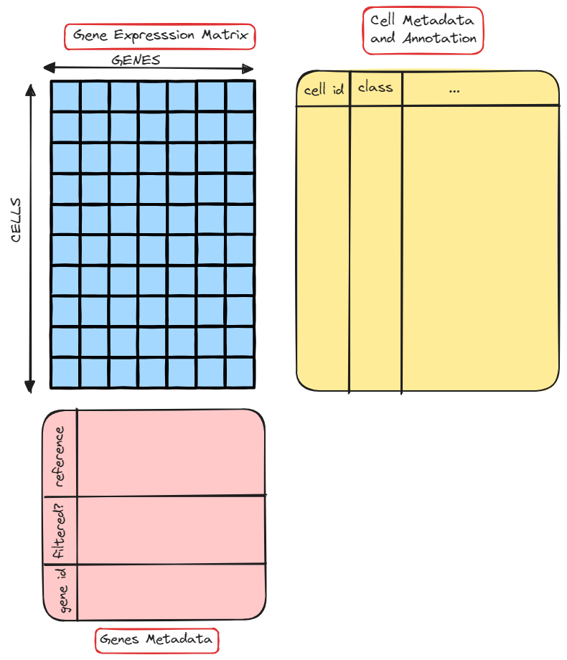

Gene expression datasets can be seen as composed of three tables :

- Gene Expression Data
- Cell meta data
   - Experiment: e.g. disease, organism, sex, donor, etc.
   - Region: e.g. layer, region, etc.
   - Stats & Analysis: e.g. ncounts, cell type, etc.
- Gene meta data
   - Avg. expression level, Is highly variable, etc.


In [3]:
# Load Cell metadata, Gene metadata and Gene expression data
manifest, file_meta = abc_mouse.merfish_files_meta()
cell_meta = abc_mouse.cell_metadata(file_meta)
gene_meta = abc_mouse.gene_metadata(file_meta)
exp_data = abc_mouse.gene_expression_matrix(manifest)

## Whole Brain Taxonomy Data
The Allen Brain Cell Atlas includes an integrated transcriptomic taxonomy that contains
 - 5,322 clusters that are organized in a hierarchical manner
     - Top level of 34 classes
     - Second-level of 338 subclasses
     - Third-level of 1,201 supertypes and
     - Fourth-level of 5,322 types/clusters.

Example of classes:

     '01 IT-ET Glut',
     '02 NP-CT-L6b Glut',
     '03 OB-CR Glut',
     '04 DG-IMN Glut',
     '05 OB-IMN GABA',
     '06 CTX-CGE GABA',
     '07 CTX-MGE GABA',
     '08 CNU-MGE GABA',
     '09 CNU-LGE GABA'

### Exteneded Cell Metadata

- Load the taxonomy data for all the cells
- Extend the cell meta data to include the class, subclass and types information.


In [4]:
# Load taxonomy data and merge with cell data
merfish_view_dir = abc_mouse.view_dir(manifest, "MERFISH-C57BL6J-638850")
cluster_details, cluster_colors = abc_mouse.taxonomy_cluster(manifest)
cell_meta_ext = cell_meta.join(cluster_details, on="cluster_alias")
cell_meta_ext = cell_meta_ext.join(cluster_colors, on="cluster_alias")
cell_meta_ext[["feature_matrix_label", "donor_label","class", "x","y","z"]]

,feature_matrix_label,donor_label,class,x,y,z
cell_label,,,,,,
1019171907102340387-1,C57BL6J-638850,C57BL6J-638850,04 DG-IMN Glut,7.226245,4.148963,6.6
1104095349101460194-1,C57BL6J-638850,C57BL6J-638850,23 P Glut,5.064889,7.309543,4.2
1017092617101450577,C57BL6J-638850,C57BL6J-638850,23 P Glut,5.792921,8.189973,4.0
1018093344101130233,C57BL6J-638850,C57BL6J-638850,23 P Glut,3.195950,5.868655,2.4
1019171912201610094,C57BL6J-638850,C57BL6J-638850,23 P Glut,5.635732,7.995842,4.4
...,...,...,...,...,...,...
1018093344100380167-3,C57BL6J-638850,C57BL6J-638850,33 Vascular,1.560003,4.669243,8.8
1017165415100930567,C57BL6J-638850,C57BL6J-638850,33 Vascular,5.032556,3.695696,11.0
1017155956102610748,C57BL6J-638850,C57BL6J-638850,33 Vascular,2.549142,4.231188,9.2


## Allen Mouse CCF co-ordinates and parcellation
- Dataset source:
    - 59 coronal sections (10 micron thick) covering the whole anterior to posterior extent of the brain (~200 micron apart) from a single adult male mouse. 
- As mentioned in a MERFISH dataset, each cell also has a set of x, y, z coordinates.
- Allen Mouse Brain Common Coordinate Framework (CCFv3, Wang et al, 2020) is a 3D reference space of an average brain at 10um voxel resolution.
- Each section from the whole brain MERFISH dataset is mapped Allen CCFv3.
- Parcellaton division, structure and substructure are derived from the co-ordinates mapped to Allen CCF.

In [5]:
# Loading CCF Meta data
merfish_ccf_view_dir = abc_mouse.view_dir(manifest, "MERFISH-C57BL6J-638850-CCF")
cell_ccf = abc_mouse.cell_ccf_meta(os.path.join(merfish_ccf_view_dir, abc_mouse.PARCEL_META_DATA))
cell_ccf[abc_mouse.CCF_COLS]

,class,subclass,supertype,cell_label,parcellation_division,parcellation_structure,parcellation_substructure,x_ccf,y_ccf,z_ccf
0,04 DG-IMN Glut,038 DG-PIR Ex IMN,0141 DG-PIR Ex IMN_2,1019171907102340387-1,HPF,DG,DG-po,7.495417,2.445872,7.455066
1,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,1104095349101460194-1,P,TRN,TRN,9.227966,6.133693,5.225024
2,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,1017092617101450577,P,P-unassigned,P-unassigned,9.344912,6.989939,6.002664
3,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,1018093344101130233,cbf,arb,arb,10.977068,4.398568,3.305223
4,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,1019171912201610094,P,P-unassigned,P-unassigned,8.997138,6.798329,5.827197
...,...,...,...,...,...,...,...,...,...,...
3739956,33 Vascular,333 Endo NN,1193 Endo NN_1,1018093344100380167-3,Isocortex,SSp-n,SSp-n2/3,5.321669,2.575568,1.694437
3739957,33 Vascular,333 Endo NN,1193 Endo NN_1,1017165415100930567,Isocortex,ACAd,ACAd5,3.493405,2.016746,5.317544
3739958,33 Vascular,333 Endo NN,1193 Endo NN_1,1017155956102610748,Isocortex,SSp-m,SSp-m6a,4.994629,2.542668,2.773582
3739959,33 Vascular,333 Endo NN,1193 Endo NN_1,1017155956101980080-1,Isocortex,SSs,SSs1,4.611080,4.157295,1.459526


# Filter data by region of interest
- Subset the data from the region of interest
- Here we will use parcellation_structure information to filter the dataset to include only "VISp" cells 
- After filtering, we observe the dataset has 61884 cells
- Note the data includes all the genes, but only has the subet

### For V1 Model
- Select only cells with "parcellation_structure" assigned as "VISp' 
- Selected 61884 cells out of ~4 million cells

In [6]:
#
# Select only primary visual cortex cells
# 
visp_cell_ccf = cell_ccf.loc[cell_ccf["parcellation_structure"] == "VISp"]
visp_cells = visp_cell_ccf["cell_label"].values
visp_cell_meta = cell_meta_ext.loc[cell_meta_ext.index.isin(visp_cells)]
visp_edata = exp_data[visp_cells, :].to_memory()
# Remove blank genes from meta data
visp_gene_meta = abc_mouse.filter_invalid_genes(visp_edata.var,
                                                abc_mouse.valid_genes_symbols(exp_data.var))

## An Unified Data frame indexed by cell ids

Construct a unified data frame where each row is a cell and contains the following information

- Gene expression for all 500 genes
- Cell Meta data including class, sub-class etc.
- CCF Meta data including parcellation structure
- Can potentially divide by sections, however we select all the necessary selection



In [7]:
# Construct a data frame with 
section = visp_cell_meta[np.repeat(True, len(visp_cell_meta))]  # All the sections
vis_exp_data = abc_mouse.create_expression_dataframe(visp_edata, visp_gene_meta, section)
# Merge with CCF data
pcl_fields = [
    "parcellation_division",
    "parcellation_structure",
    "parcellation_substructure",
    "x_ccf",
    "y_ccf",
    "z_ccf",
]
uni_vis_data = vis_exp_data.join(cell_ccf.set_index("cell_label").loc[vis_exp_data.index][pcl_fields])
uni_vis_data

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,...,D130079A08Rik,Th,Cpa6,Chrnb3,parcellation_division,parcellation_structure,parcellation_substructure,x_ccf,y_ccf,z_ccf
cell_label,,,,,,,,,,,,,,,,,,,,,
1019171912101090014,C57BL6J-638850.27,1392,0.503378,C57BL6J-638850,C57BL6J-638850,wt/wt,M,2.819100,2.950538,4.4,...,0.0,4.154092,0.0,0.0,Isocortex,VISp,VISp1,9.509721,0.901237,2.895278
1019171910102620041,C57BL6J-638850.28,2762,0.619897,C57BL6J-638850,C57BL6J-638850,wt/wt,M,8.575359,3.544662,4.6,...,0.0,0.000000,0.0,0.0,Isocortex,VISp,VISp1,9.473174,1.222132,8.924495
1018093344102530111,C57BL6J-638850.30,2762,0.511105,C57BL6J-638850,C57BL6J-638850,wt/wt,M,8.255579,3.221833,5.0,...,0.0,0.000000,0.0,0.0,Isocortex,VISp,VISp1,9.139257,0.826688,8.516236
1104095349102680609,C57BL6J-638850.32,2762,0.500018,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.960361,2.709145,5.6,...,0.0,0.000000,0.0,0.0,Isocortex,VISp,VISp1,8.610712,0.577695,8.151409
1104095349102660266,C57BL6J-638850.26,4167,0.758485,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.934241,3.318038,4.2,...,0.0,0.000000,0.0,0.0,Isocortex,VISp,VISp2/3,9.811997,1.280163,8.333446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017092617100930301,C57BL6J-638850.25,5252,0.622523,C57BL6J-638850,C57BL6J-638850,wt/wt,M,2.333337,3.313140,4.0,...,0.0,0.000000,0.0,0.0,Isocortex,VISp,VISp2/3,9.777015,1.667330,2.316296
1019171910102330273,C57BL6J-638850.28,5254,0.610059,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.715431,4.012398,4.6,...,0.0,0.000000,0.0,0.0,Isocortex,VISp,VISp6b,9.398504,1.703292,8.045281
1018093345100980268,C57BL6J-638850.31,5252,0.576186,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.845881,3.552941,5.4,...,0.0,1.314571,0.0,0.0,Isocortex,VISp,VISp6b,8.694443,1.538395,8.159167


## Inhibitatory Fraction within Each Layer

- A V1 model can used the fraction of inhibitatory neurons as a parameters

## Steps to derive inhibitatory fraction from Spatial Transcriptomics dataset 
- Each cell is annoted with a class label and a CCF parcellation substructre 
- Annotation give in a spreadsheat [Class annotation](https://allen-brain-cell-atlas.s3-us-west-2.amazonaws.com/metadata/WMB-taxonomy/20231215/cl.df_CCN202307220.xlsx)
- 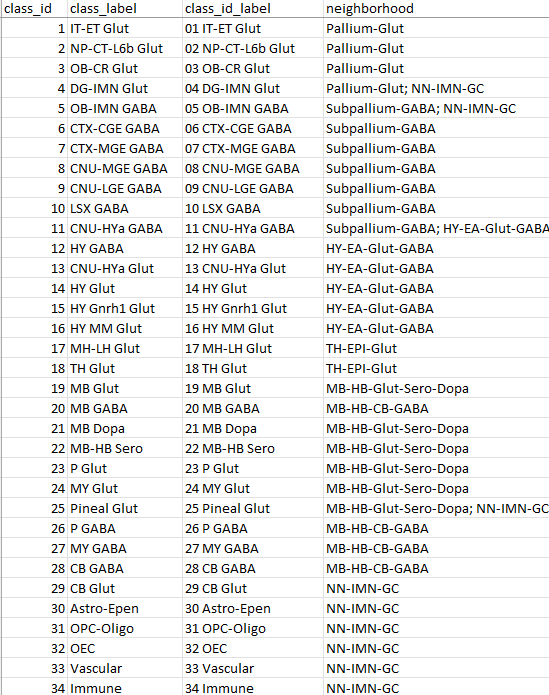
- To find this ihibitatory ratio, we assume:
    - The class label with GABA as inhibitory neurons
    - The class label with Glut as excitatory neurons
    - Identify the ratio of inhibitatory with respect to the total neurons for each layer

In [8]:
pred = uni_vis_data['class'].str.endswith("Glut") | uni_vis_data['class'].str.endswith("GABA")
# Select only GABA and Glut cells
visp_ei_data = uni_vis_data.loc[pred]
visp_ei_data.loc[:,["E"]] = visp_ei_data['class'].str.endswith("Glut")
visp_ei_data.loc[:,["I"]] = visp_ei_data['class'].str.endswith("GABA")
# Group by sub structure and find counts
visp_ei_data = visp_ei_data[["parcellation_substructure", "E","I"]]
visp_ei_ratio = visp_ei_data.groupby("parcellation_substructure").sum()
visp_ei_ratio["T"] = visp_ei_ratio["E"] + visp_ei_ratio["I"]
visp_ei_ratio["inhibitory fraction"] = visp_ei_ratio["I"]/visp_ei_ratio["T"]
visp_ei_ratio

,E,I,T,inhibitory fraction
parcellation_substructure,,,,
VISp1,577,393,970,0.405155
VISp2/3,16400,1402,17802,0.078755
VISp4,9443,1190,10633,0.111916
VISp5,6962,1380,8342,0.165428
VISp6a,8181,548,8729,0.062779
VISp6b,1432,80,1512,0.052910


## Fraction within Excitatory/Inhibitatory cell types

- Models use fraction of cell types within each excitatory and inhibitatory set.
- We examine two cell types Pvalb and Vip ratios based on the Gene expression Data

## Steps
- Select only the inhibitatory cell types (class "GABA")
- Among these selected cells, compute the average gene expression of each gene within each layer
- Compare the ratio of the gene expression to the ratio of the fractio

In [10]:
pred = uni_vis_data['class'].str.endswith("GABA")
# Select only GABA cells
visp_ib_data = uni_vis_data.loc[pred]
# Select the genes of interset
select_genes = [
        "Vip",
        "Pvalb",
]
# Find the average gene expression Values for the genes
visp_ib = abc_mouse.aggregate_by_metadata(visp_ib_data, visp_gene_meta.gene_symbol, "parcellation_substructure")
visp_ib = visp_ib[select_genes]
# Compute the metrics
visp_ib["Vip/Pvalb"] = visp_ib["Vip"] / visp_ib["Pvalb"]
visp_ib

,Vip,Pvalb,Vip/Pvalb
parcellation_substructure,,,
VISp1,1.175488,0.348229,3.375614
VISp2/3,2.177189,1.957211,1.112394
VISp4,0.983001,3.078295,0.319333
VISp5,0.392929,2.724201,0.144236
VISp6a,0.514191,2.864859,0.179482
VISp6b,0.440343,1.831582,0.240417
